In [28]:
import pandas as pd
from datetime import datetime
import numpy as np

bitcoin=pd.read_csv('BitCoin.csv')
bitcoin

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000
...,...,...,...,...,...,...,...,...
1604,1604,2013-02-05,116.38,125.60,92.28,105.21,6.722784e+06,1292190000
1605,1605,2013-01-05,139.00,139.89,107.72,116.99,8.026719e+06,1542820000
1606,1606,2013-04-30,144.00,146.93,134.05,139.00,8.312655e+06,1597780000
1607,1607,2013-04-29,134.44,147.49,134.00,144.54,7.757951e+06,1491160000


#### 2016.6 ~ 2017.6 기간

In [23]:
#날짜형으로 변환
bitcoin['Date'] = bitcoin['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

##기간 추출
start=datetime.strptime('2016-06-01', '%Y-%m-%d')
end=datetime.strptime('2017-06-30', '%Y-%m-%d')
during=bitcoin[bitcoin['Date'].isin(pd.date_range(start, end))]
during

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
16,16,2017-06-09,4376.59,4617.25,4376.59,4597.12,2.172100e+09,72418700000
17,17,2017-05-09,4228.29,4427.84,3998.11,4376.53,2.697970e+09,69954400000
18,18,2017-04-09,4591.63,4591.63,4108.40,4236.31,2.987330e+09,75955500000
19,19,2017-03-09,4585.27,4714.08,4417.59,4582.96,1.933190e+09,75841700000
20,20,2017-02-09,4901.42,4975.04,4469.24,4578.77,2.722140e+09,81060600000
...,...,...,...,...,...,...,...,...
621,621,2016-10-01,448.24,448.31,440.35,447.99,3.599590e+07,6752210000
622,622,2016-09-01,453.38,454.64,446.89,447.61,3.227800e+07,6828000000
623,623,2016-08-01,457.54,462.93,447.94,453.23,5.699300e+07,6888600000
624,624,2016-07-01,430.01,458.77,429.08,458.05,8.756220e+07,6472580000


In [7]:
type(bitcoin["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
ma_5=during["Open"].rolling(window=5).mean()

In [33]:
len(ma_5)

377

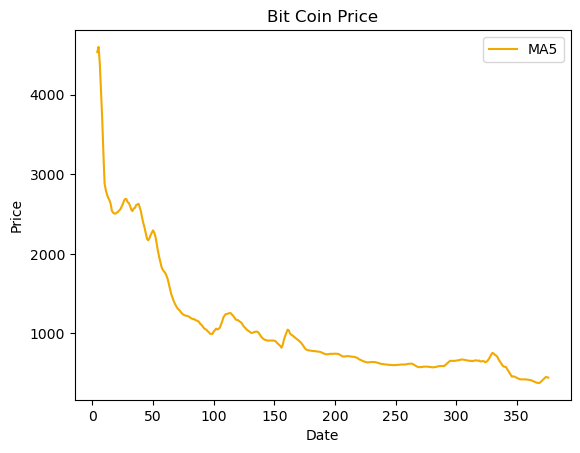

In [34]:
import matplotlib.pyplot as plt


plt.plot(np.arange(len(during)), ma_5, label="MA5",color='#f2a900')
#plt.xticks(np.arange(len(during)),during.Date,rotation=45) #미관상 안 좋아서 없앴음
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title('Bit Coin Price')
plt.show()

### Bonus Part
- 비트코인 + 이더리움 그래프

In [35]:
eth=pd.read_csv('ETH_day.csv')
eth

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57
...,...,...,...,...,...,...,...,...
1433,2016-05-13,ETHUSD,10.20,11.59,10.20,10.69,1769.71,18923.55
1434,2016-05-12,ETHUSD,10.43,12.00,9.92,10.20,2072.56,22183.39
1435,2016-05-11,ETHUSD,9.68,10.47,9.68,10.43,3052.51,30978.11
1436,2016-05-10,ETHUSD,9.98,9.98,9.36,9.68,672.06,6578.20


In [36]:
#날짜형으로 변환
eth['Date'] = eth['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

##기간 추출
start=datetime.strptime('2016-06-01', '%Y-%m-%d')
end=datetime.strptime('2017-06-30', '%Y-%m-%d')
during_eth=eth[eth['Date'].isin(pd.date_range(start, end))]
during_eth

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
1020,2017-06-30,ETHUSD,293.80,304.94,270.77,280.80,146545.22,42337469.59
1021,2017-06-29,ETHUSD,317.59,322.84,285.23,293.80,152271.32,46521350.06
1022,2017-06-28,ETHUSD,286.21,324.95,260.49,317.59,184030.56,54573461.77
1023,2017-06-27,ETHUSD,253.00,288.17,210.02,286.21,173179.40,42085473.60
1024,2017-06-26,ETHUSD,278.73,299.90,210.00,253.00,249076.24,60950252.99
...,...,...,...,...,...,...,...,...
1410,2016-06-05,ETHUSD,13.86,13.92,13.70,13.91,787.49,10869.67
1411,2016-06-04,ETHUSD,14.02,14.16,13.64,13.86,4330.50,59977.39
1412,2016-06-03,ETHUSD,13.90,16.05,13.50,14.02,11426.53,157342.19
1413,2016-06-02,ETHUSD,13.95,14.13,13.82,13.90,942.85,13180.38


In [37]:
ma_5_eth=during_eth["Open"].rolling(window=5).mean()

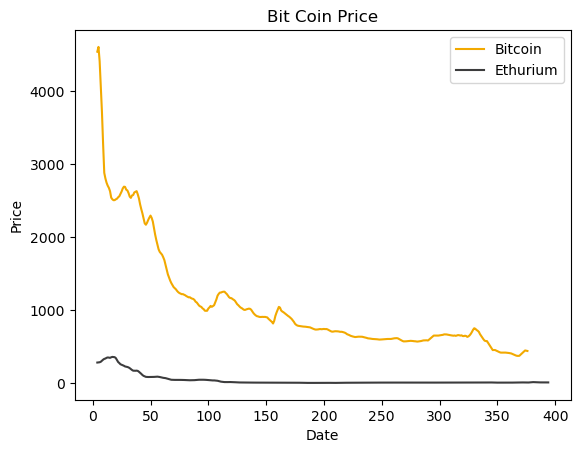

In [39]:
plt.plot(np.arange(len(during)), ma_5,color='#f2a900',label='Bitcoin')
plt.plot(np.arange(len(during_eth)), ma_5_eth,color='#3c3c3d',label='Ethurium')
#plt.xticks(np.arange(len(during)),during.Date,rotation=45) #미관상 안 좋아서 없앴음
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title('Bit Coin Price')
plt.show()